In [64]:
import warnings
warnings.filterwarnings("ignore")
import constants as const
import matplotlib.pyplot as plt
import glob as glob
import numpy as np
import pandas as pd

In [65]:
def import_metric(file, name):
    df = pd.read_csv(file,names=[name,"time"])
    return df

In [66]:
def static_part_of_name(nodes, features, error, window, epoch):
    return "nw_"+"k"+str(nodes)+"_ft"+str(features)+"_e"+str(error)+"_win"+str(window)+"_ep"+str(epoch)

In [67]:
def plot_metrics(gm_list, fgm_list,label_list, y_title:str, metric):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
    
    for i in range(len(label_list)):
        ax[0].plot(gm_list[i]["time"],gm_list[i][y_title].fillna(method='ffill'), label=metric+"="+label_list[i],linewidth=3)
        ax[1].plot(fgm_list[i]["time"],fgm_list[i][y_title].fillna(method='ffill'),label=metric+"="+label_list[i],linewidth=3)
    
    
    for i in range(2):
        #adjust plot interface
        ax[i].legend(fontsize=18)
        ax[i].grid(True,linestyle='dashdot', color='grey')
        ax[i].tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)
        # set axis titles
        ax[i].set_xlabel("unit time",fontsize=20)
        ax[i].set_ylabel(y_title,fontsize=20)
    # set central titles
    ax[0].set_title("GM",fontsize=25,pad =15)
    ax[1].set_title("FGM",fontsize=25,pad =15)

    # if y_title == "rounds":
    #     plt.ylim(0,100)



In [68]:
def plot_simple_diagram(filename, y_title, title):
    data = import_metric(filename,y_title)
    
    fig, ax = plt.subplots(figsize=(50, 10))
    
    ax.plot(data["time"], data[y_title],linewidth=3) 
    
    ax.legend(fontsize=18)
    ax.grid(True,linestyle='dashdot', color='grey')
    ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)
    # set axis titles
    ax.set_xlabel("unit time",fontsize=20)
    ax.set_ylabel(y_title,fontsize=20)
    # set central titles
    ax.set_title(title, size=25,pad =15)
    
    

In [69]:
def plot_accuracy( data:str, metric:str, nodes:int, features:int, error:float, window:int, epoch:int, tempo:int):
    
    gm_list =[]
    fgm_list =[]
    label_list=[]
       
    y_title = "regret" if (data =="drift")  else "mae"
        
    if metric=="nodes":
        for i in range(10,nodes+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="features":
        for i in range(10,features+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="error":
        for i in range(5,int(error*100)+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
            
    elif metric=="window":
        for i in range(500,window+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    else:
        raise Exception("Wrong metric: " + metric)

    plot_metrics( gm_list, fgm_list, label_list, y_title, metric) 

In [70]:
def plot_rounds( data:str, metric:str, nodes:int, features:int, error:float, window:int, epoch:int, tempo:int):
    
    gm_list =[]
    fgm_list =[]
    label_list=[]
       
    y_title = "rounds"
        
    if metric=="nodes":
        for i in range(10,nodes+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="features":
        for i in range(10,features+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="error":
        for i in range(5,int(error*100)+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
            
    elif metric=="window":
        i=100
        for i in range(500,window+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    else:
        raise Exception("Wrong metric: " + metric)

    plot_metrics( gm_list, fgm_list, label_list, y_title, metric)

In [71]:
def plot_traffic( data:str, metric:str, nodes:int, features:int, error:float, window:int, epoch:int, tempo:int):
    
    gm_list =[]
    fgm_list =[]
    label_list=[]
       
    y_title = "traffic"
        
    if metric=="nodes":
        for i in range(10,nodes+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="features":
        for i in range(10,features+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="error":
        for i in range(5,int(error*100)+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
            
    elif metric=="window":
        for i in range(500,window+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    else:
        raise Exception("Wrong metric: " + metric)

    plot_metrics( gm_list, fgm_list, label_list, y_title, metric)

In [72]:
def plot_upstream_traffic( data:str, metric:str, nodes:int, features:int, error:float, window:int, epoch:int,
                           tempo:int):
    
    gm_list =[]
    fgm_list =[]
    label_list=[]
       
    y_title = "upstream"
        
    if metric=="nodes":
        
       
        for i in range(1,nodes+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=i,
                                            features=features,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="features":
        for i in range(2,features+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=i,error=error,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    elif metric=="error":
        for i in range(10,(error*100)+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=i/100,window=window,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
            
    elif metric=="window":
        for i in range(500,window+1,tempo):
            filename = "io_files/gm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            gm_list.append(import_metric(filename,y_title))

            filename = "io_files/fgm/"+ data +"/"+ metric +"/"+ y_title +"/"+ static_part_of_name(nodes=nodes,
                                            features=features,error=error,window=i,epoch=epoch)+".csv"
            fgm_list.append(import_metric(filename, y_title))
            label_list.append(str(i))
           
    else:
        raise Exception("Wrong metric: " + metric)

    plot_metrics( gm_list, fgm_list, label_list, y_title, metric)

### Diagrams for accuracy: 

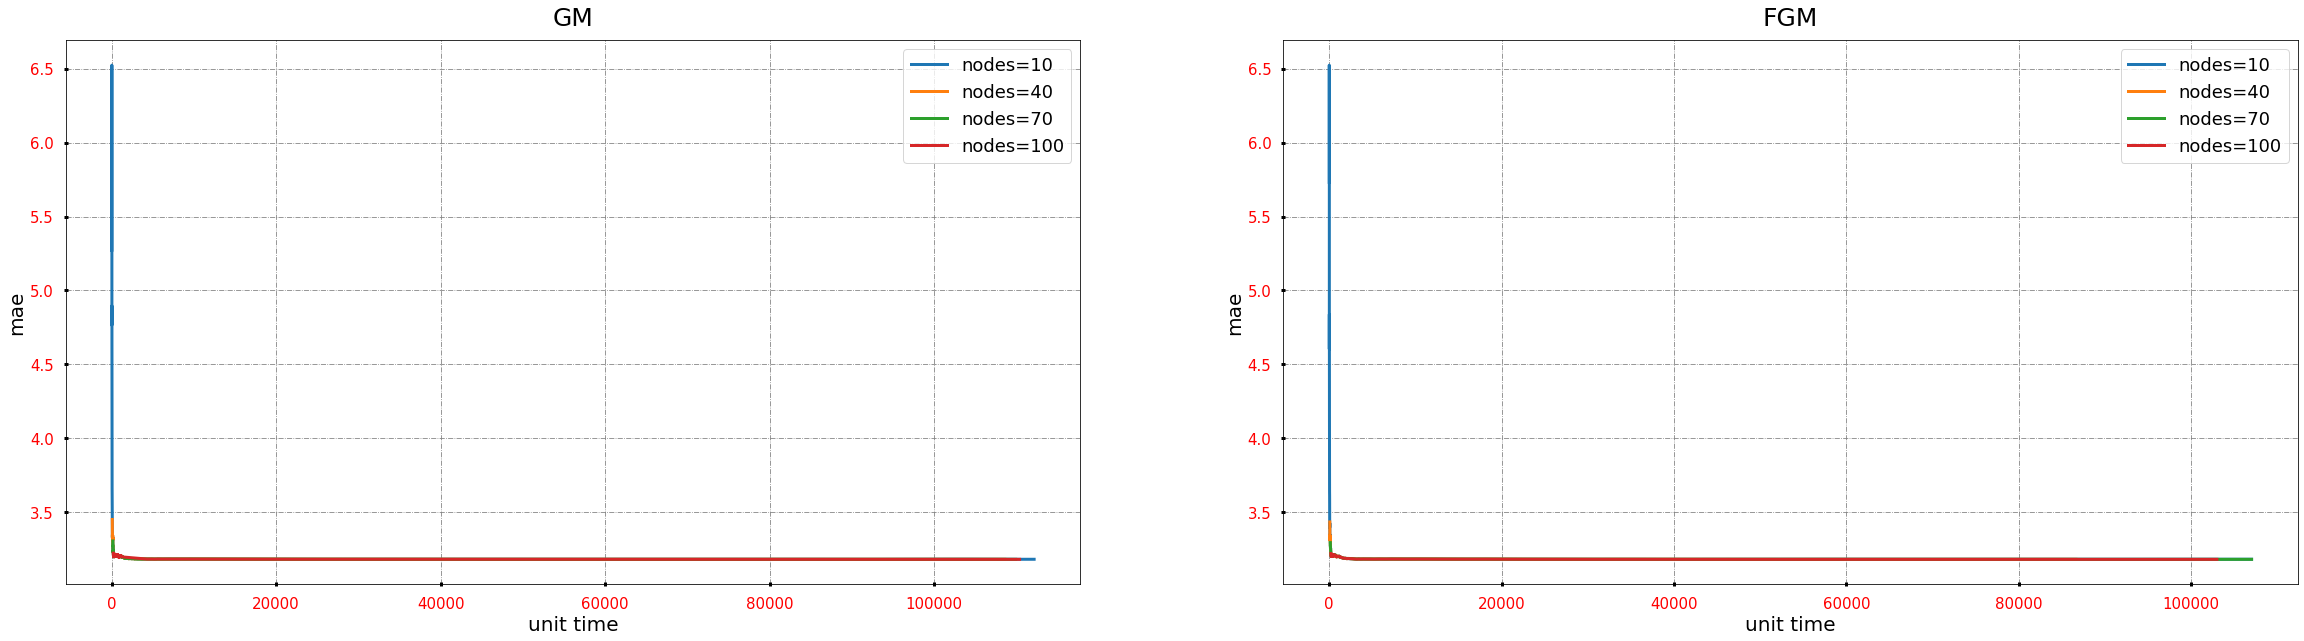

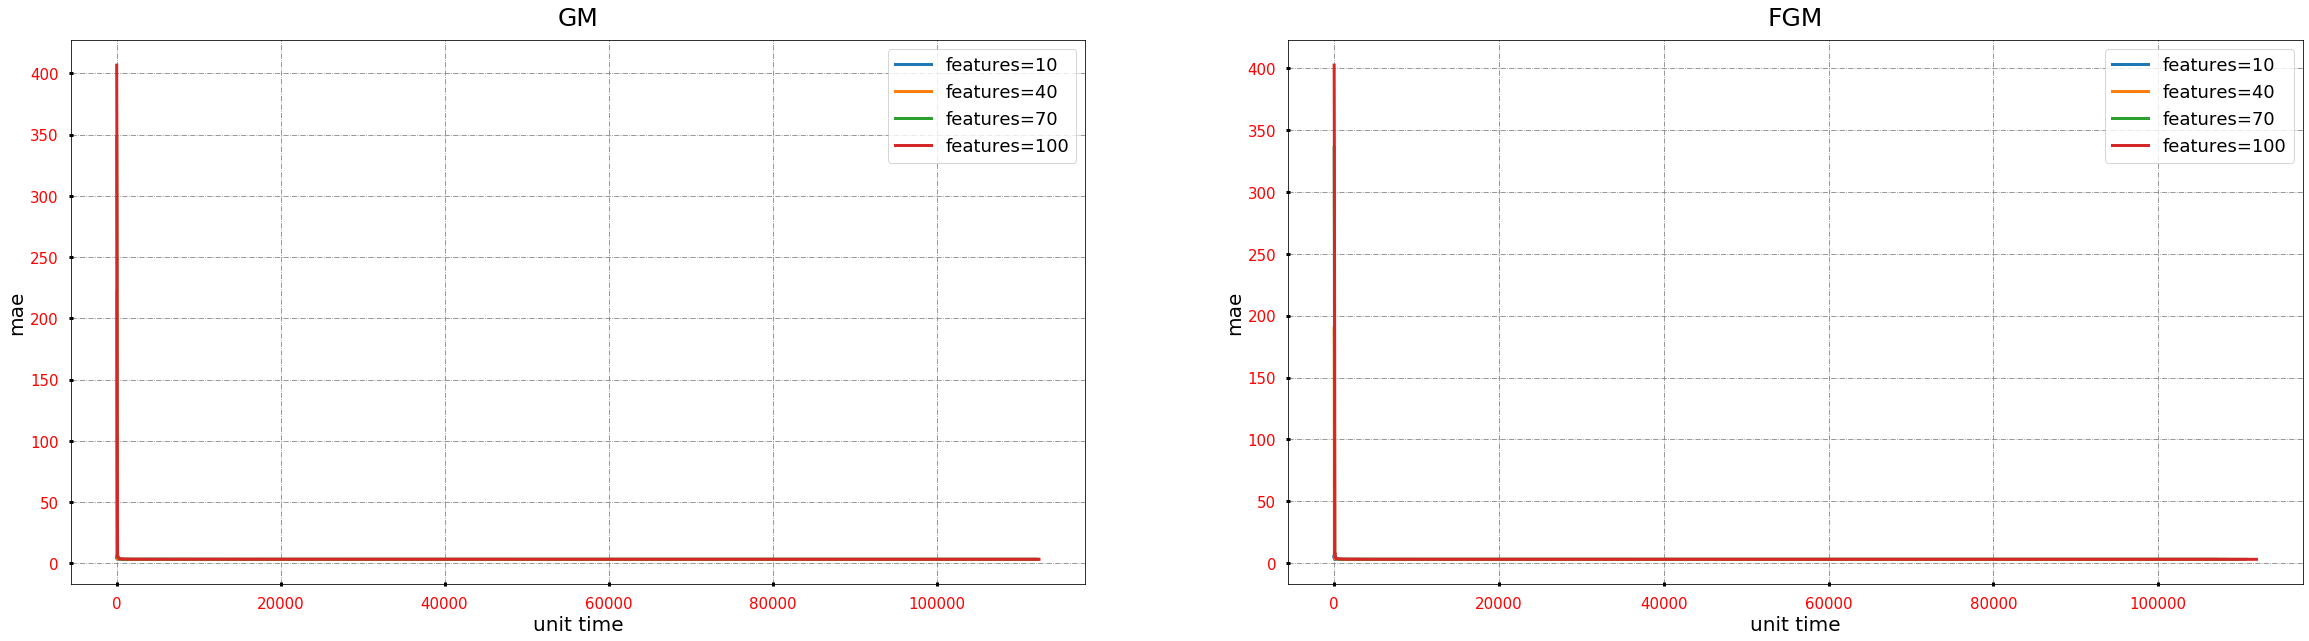

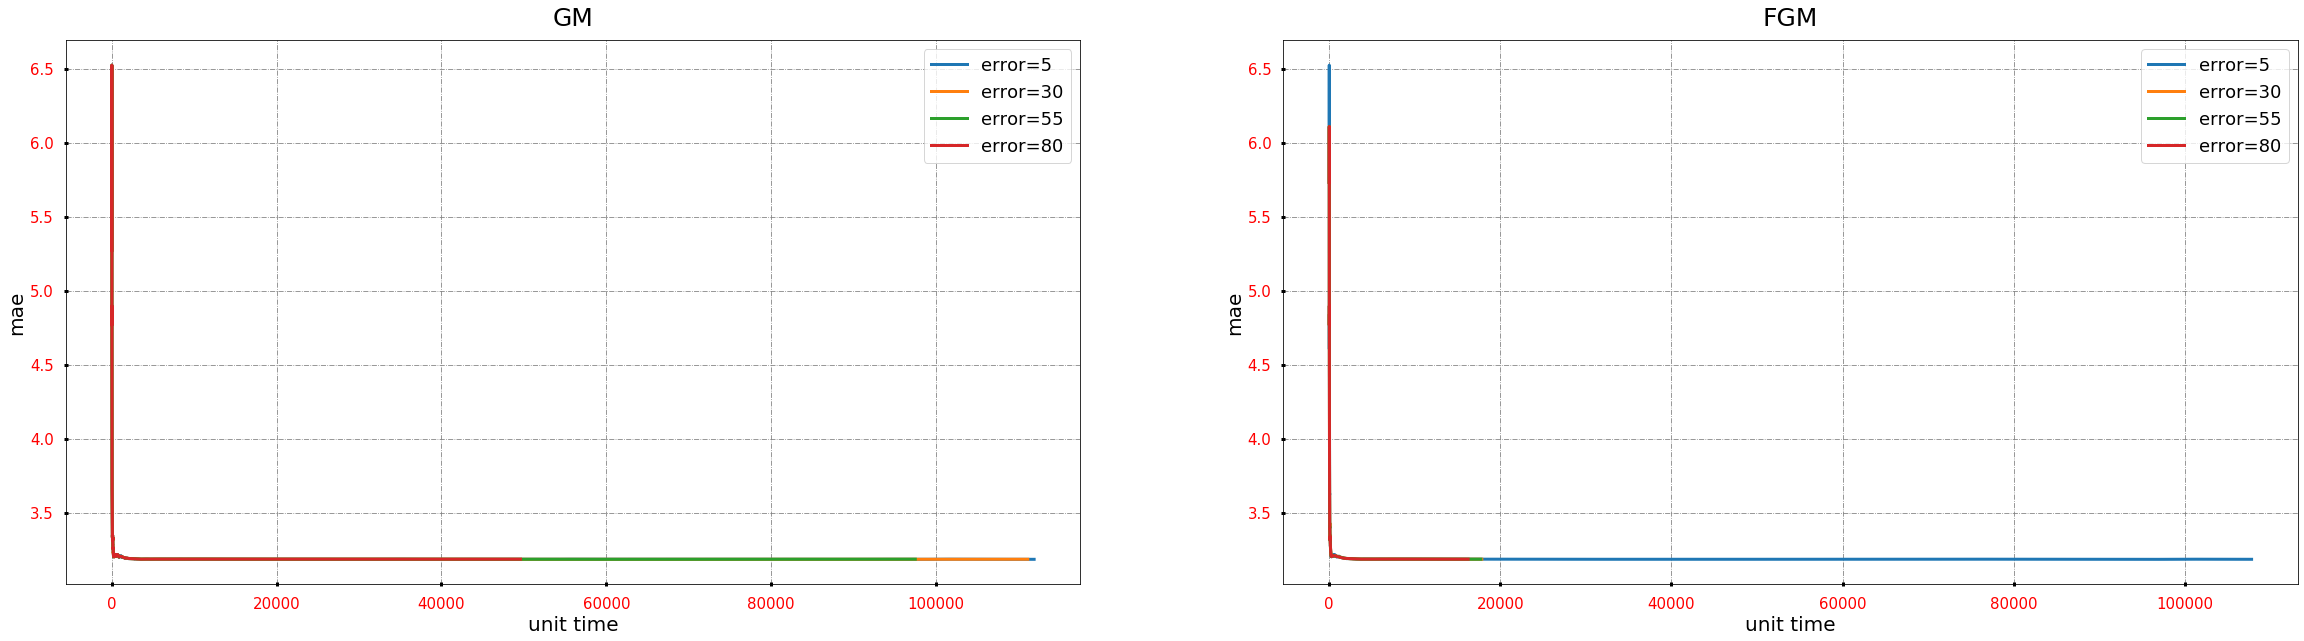

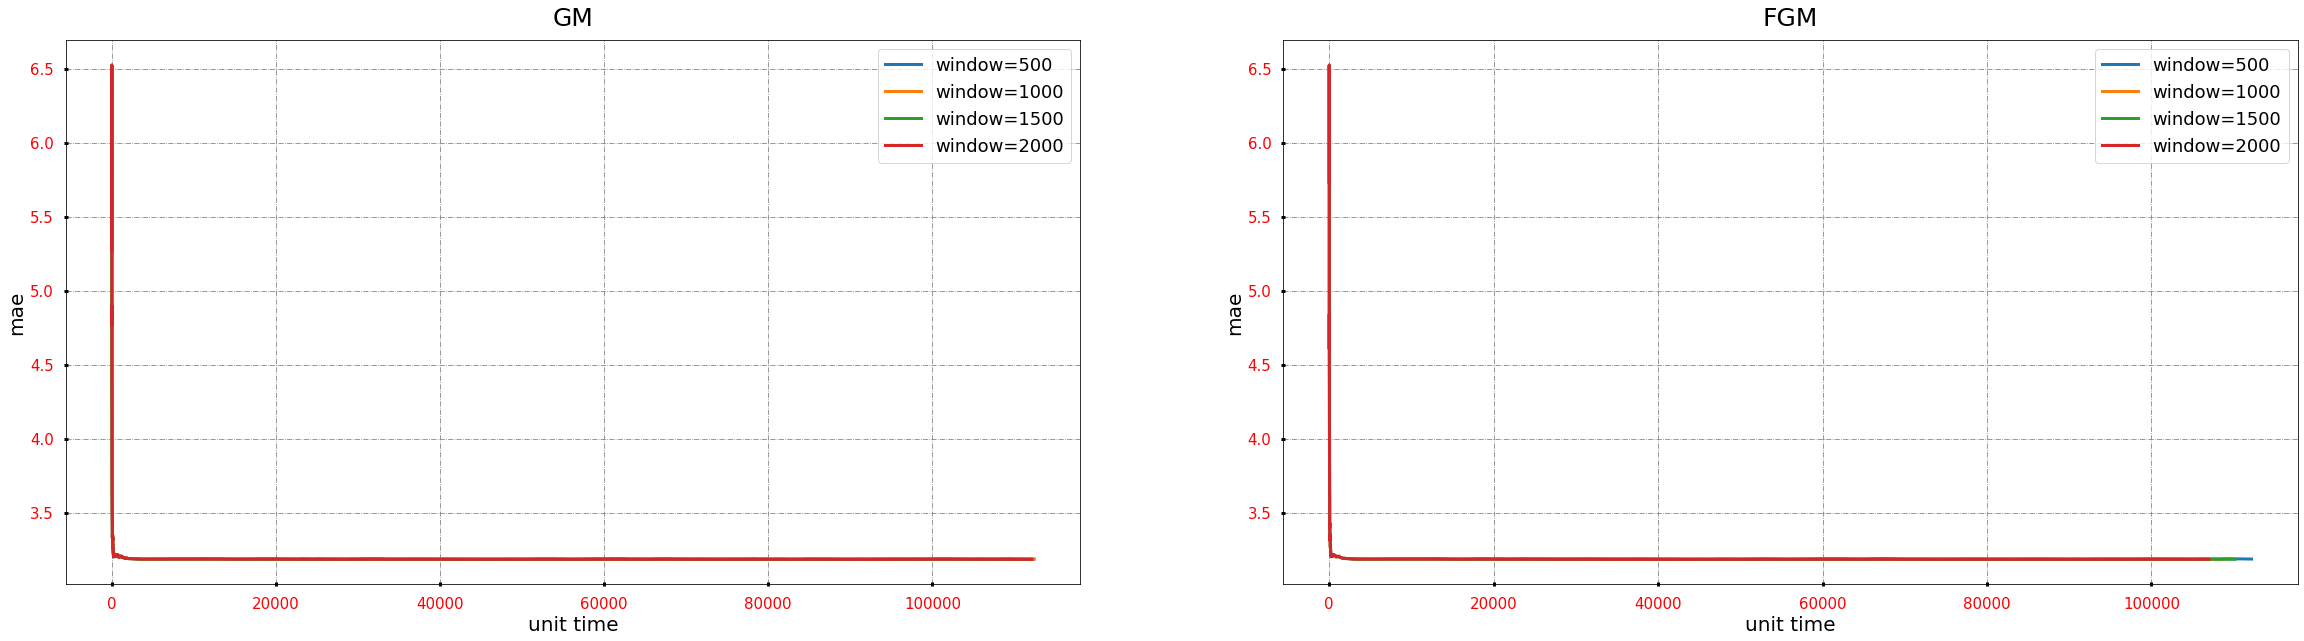

In [73]:
plot_accuracy( data="fixed", metric="nodes", nodes=100, features=10, error=0.1, window=2000, epoch=1, tempo=30)
plot_accuracy( data="fixed", metric="features", nodes=10, features=100, error=0.1, window=2000, epoch=1, tempo=30)
plot_accuracy( data="fixed", metric="error", nodes=10, features=10, error=0.80, window=2000, epoch=1, tempo=25)
plot_accuracy( data="fixed", metric="window", nodes=10, features=10, error=0.1, window=2000, epoch=1, tempo=500)

### Diagrams for rounds:

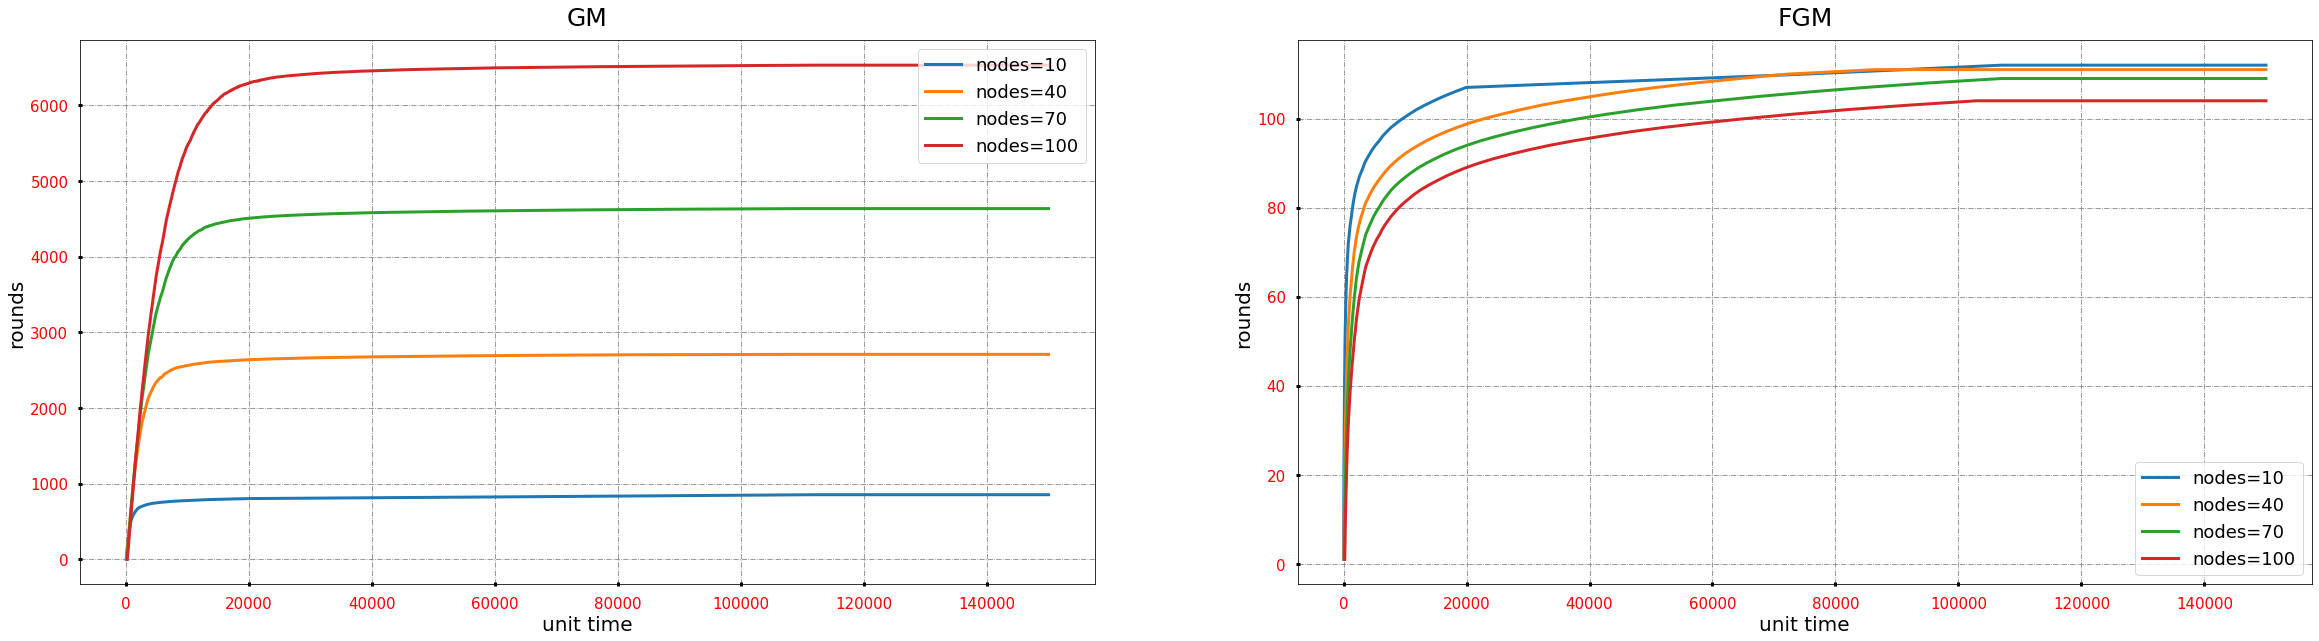

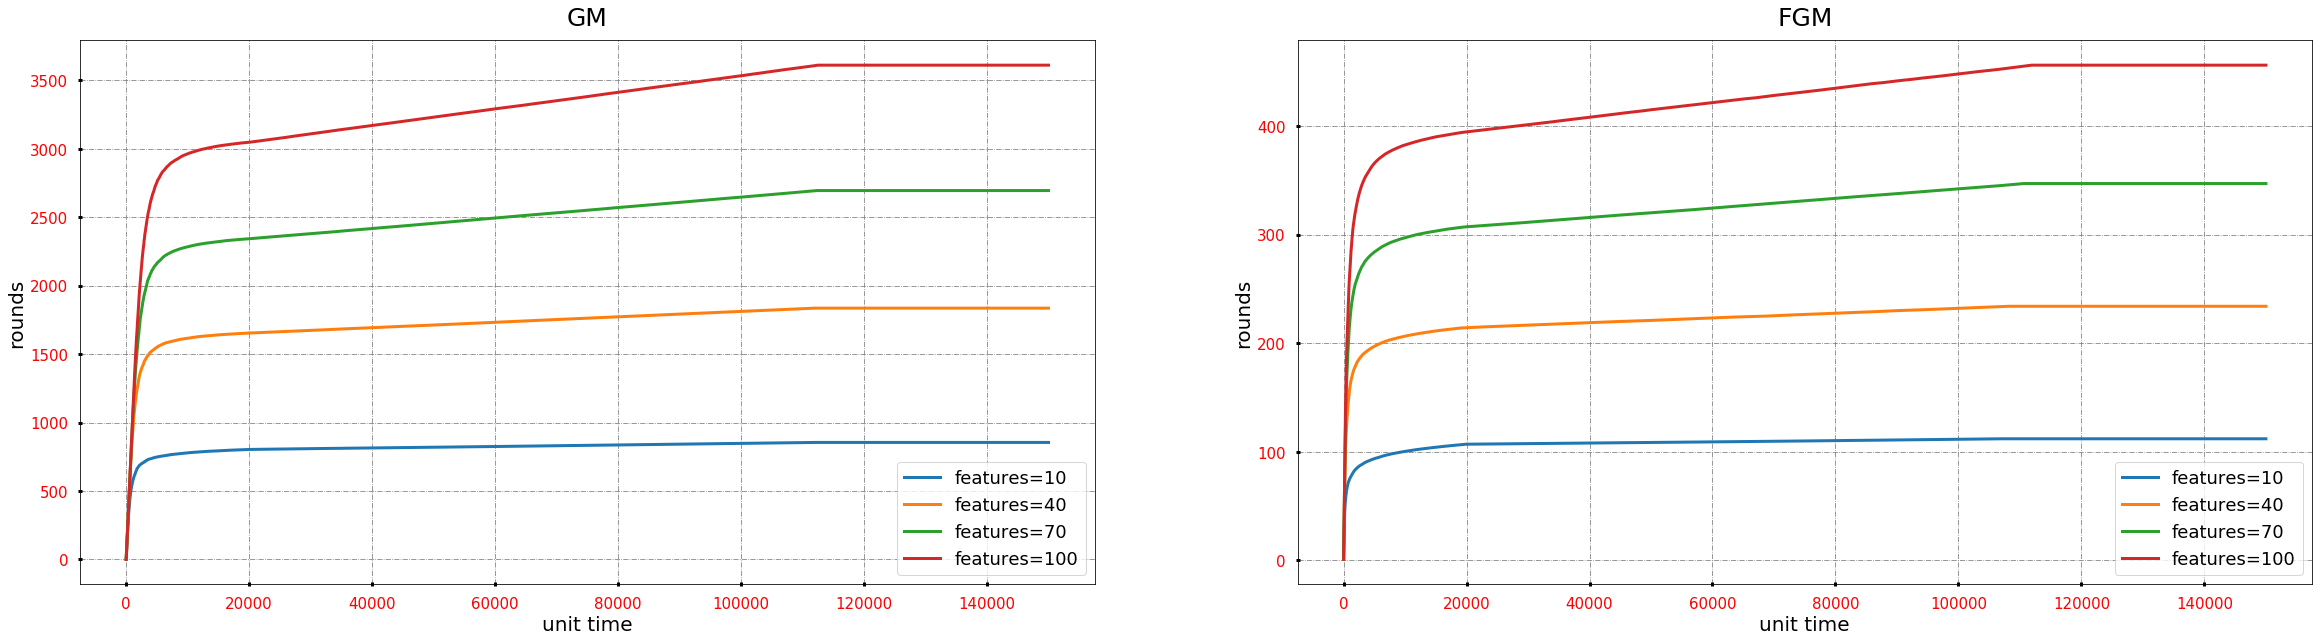

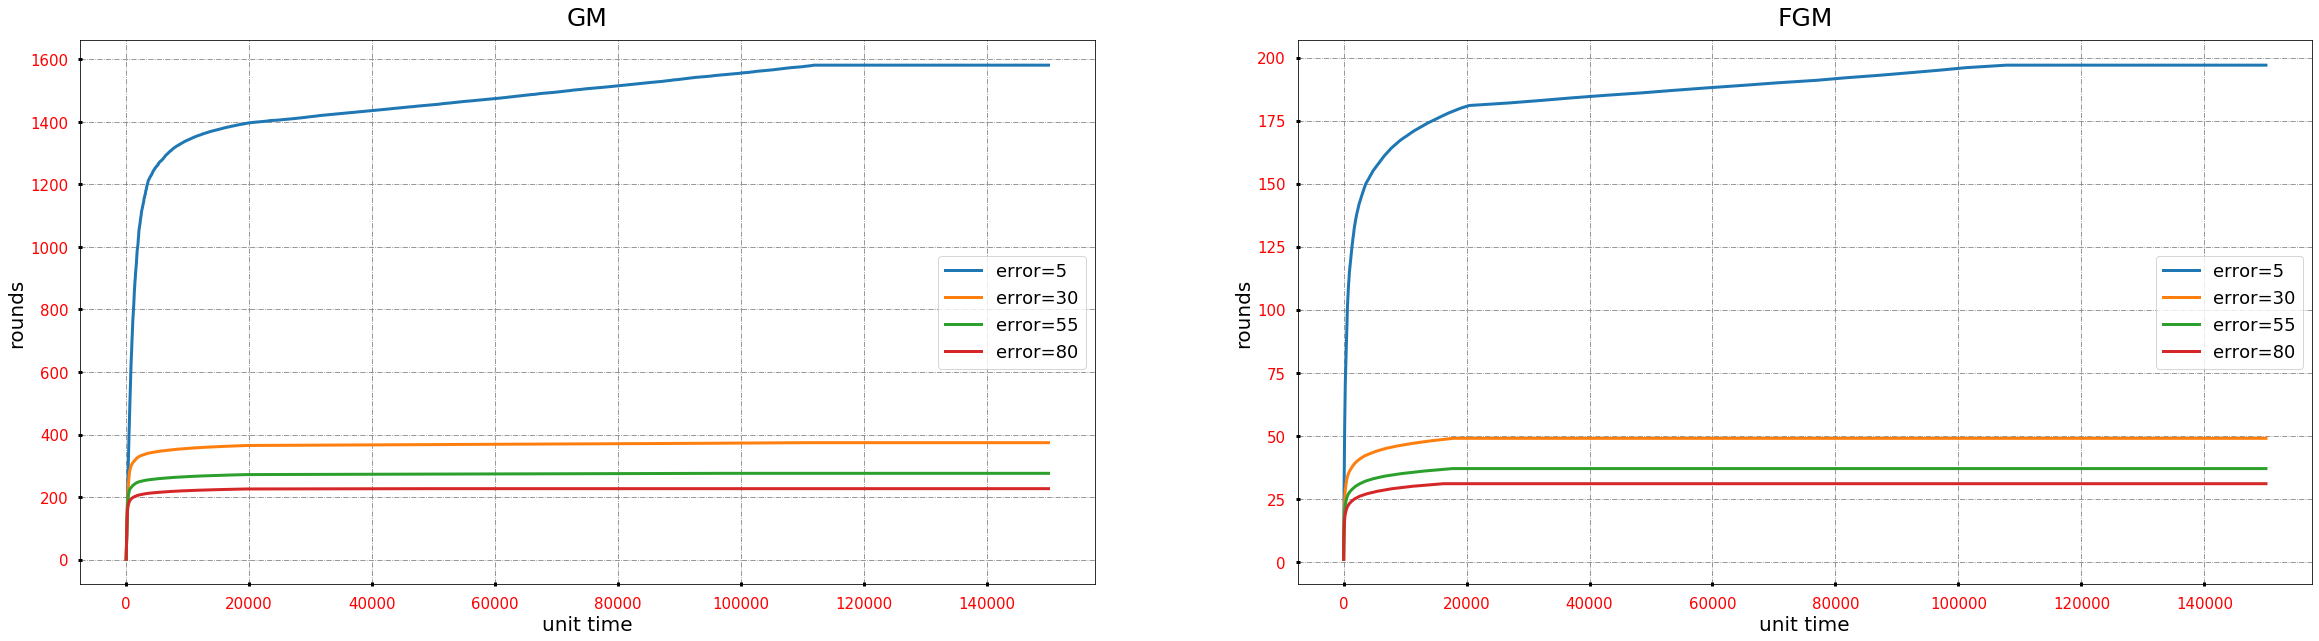

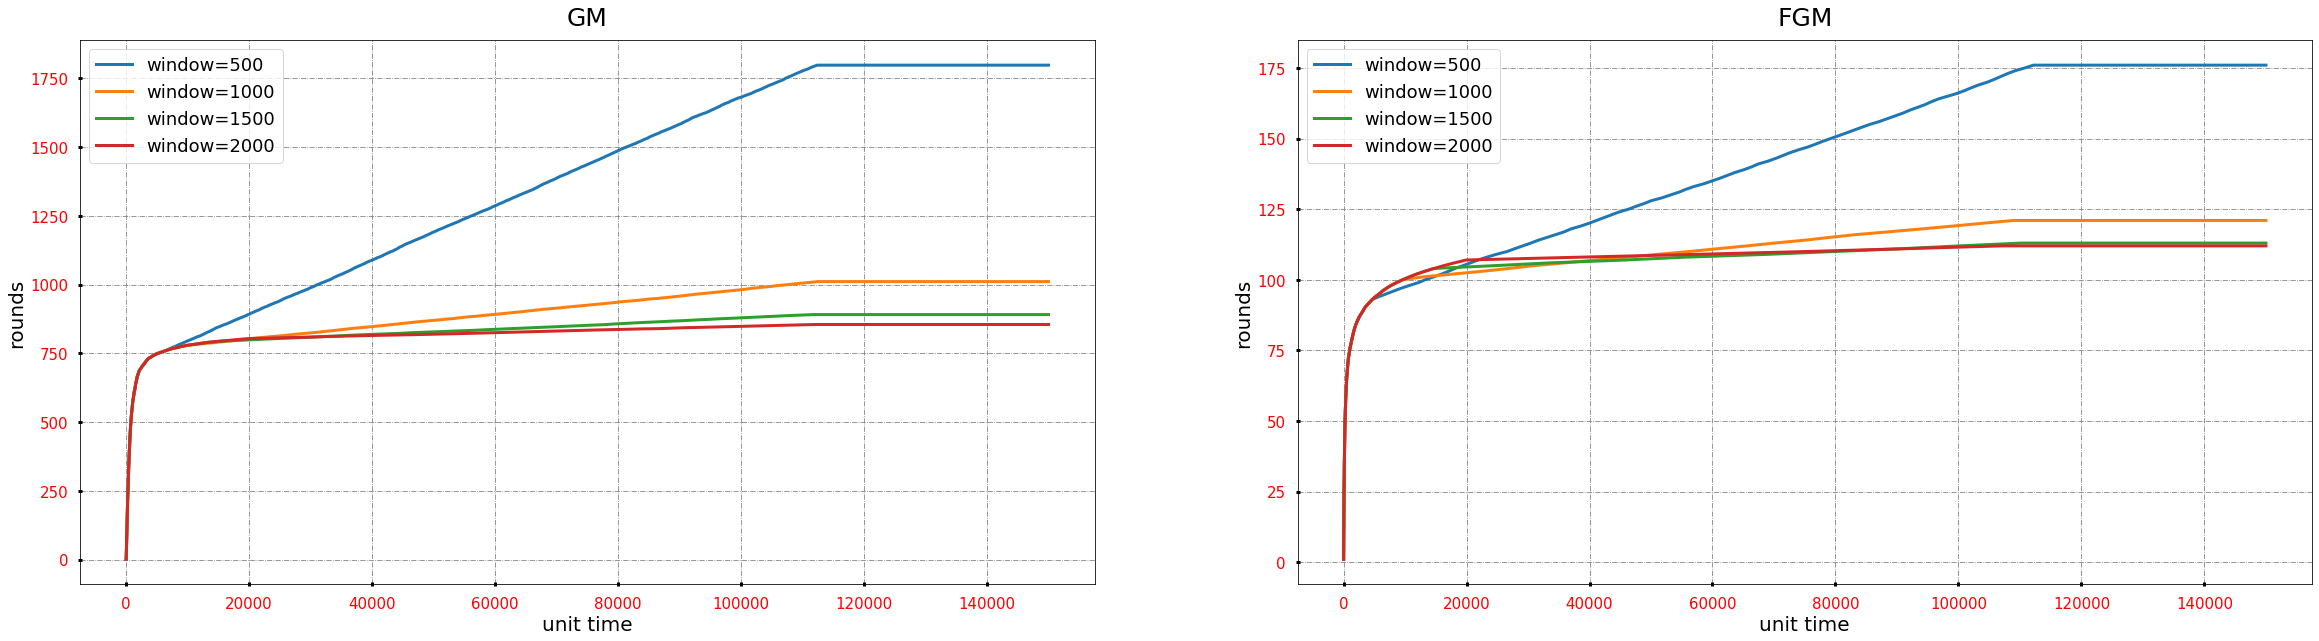

In [74]:
plot_rounds( data="fixed", metric="nodes", nodes=100, features=10, error=0.1, window=2000, epoch=1, tempo=30)
plot_rounds( data="fixed", metric="features", nodes=10, features=100, error=0.1, window=2000, epoch=1, tempo=30)
plot_rounds( data="fixed", metric="error", nodes=10, features=10, error=0.80, window=2000, epoch=1, tempo=25)
plot_rounds( data="fixed", metric="window", nodes=10, features=10, error=0.1, window=2000, epoch=1, tempo=500)

### Diagrams for total traffic (in bytes):

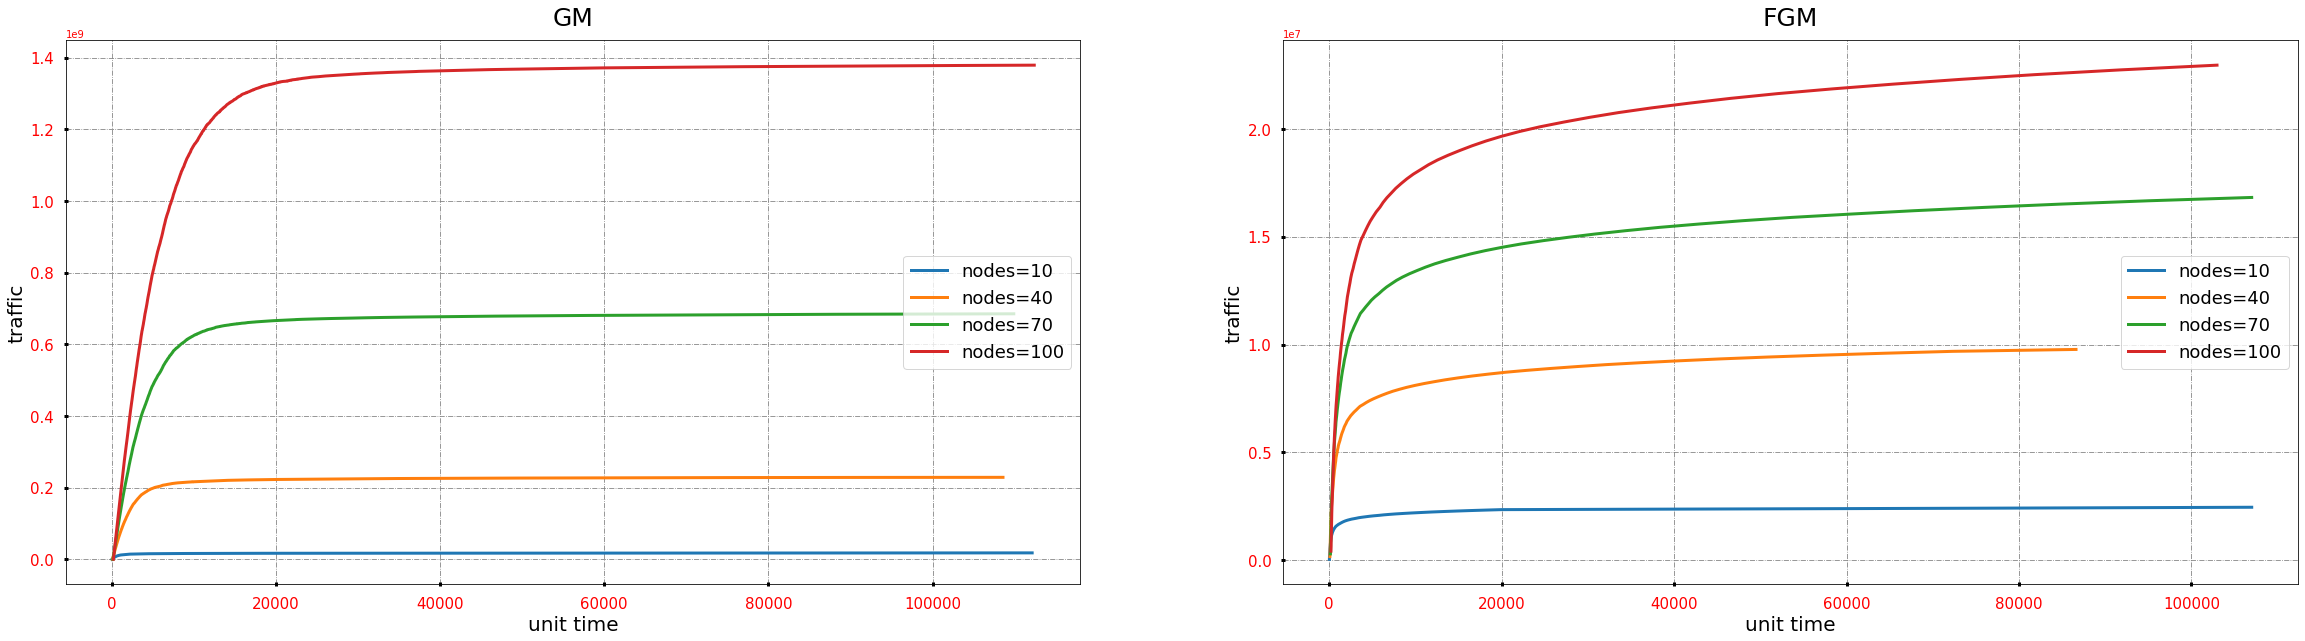

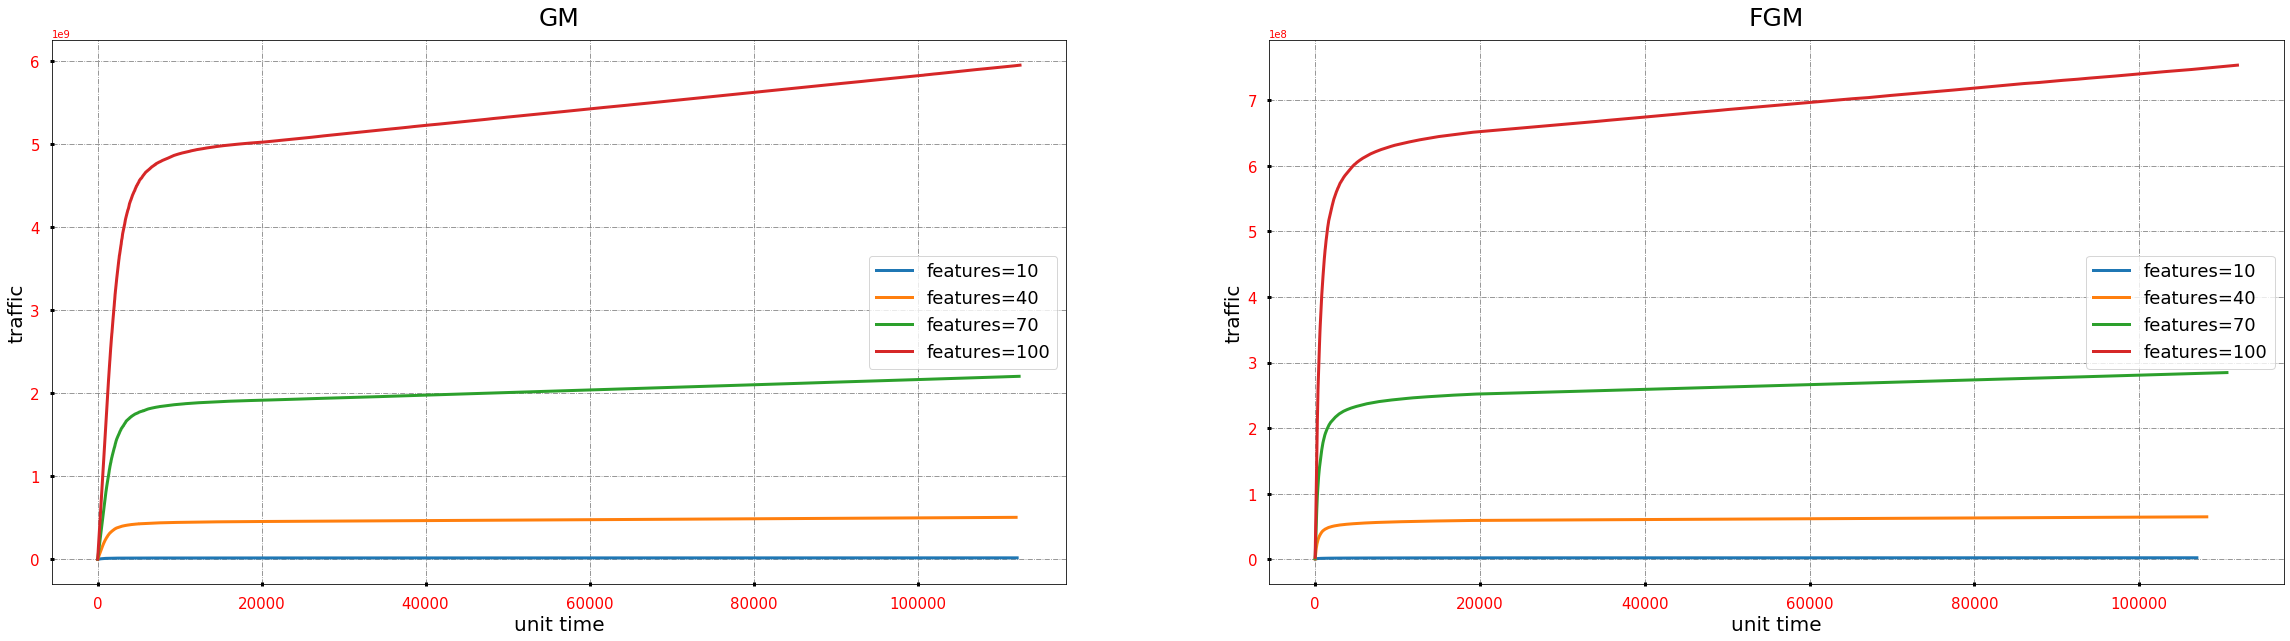

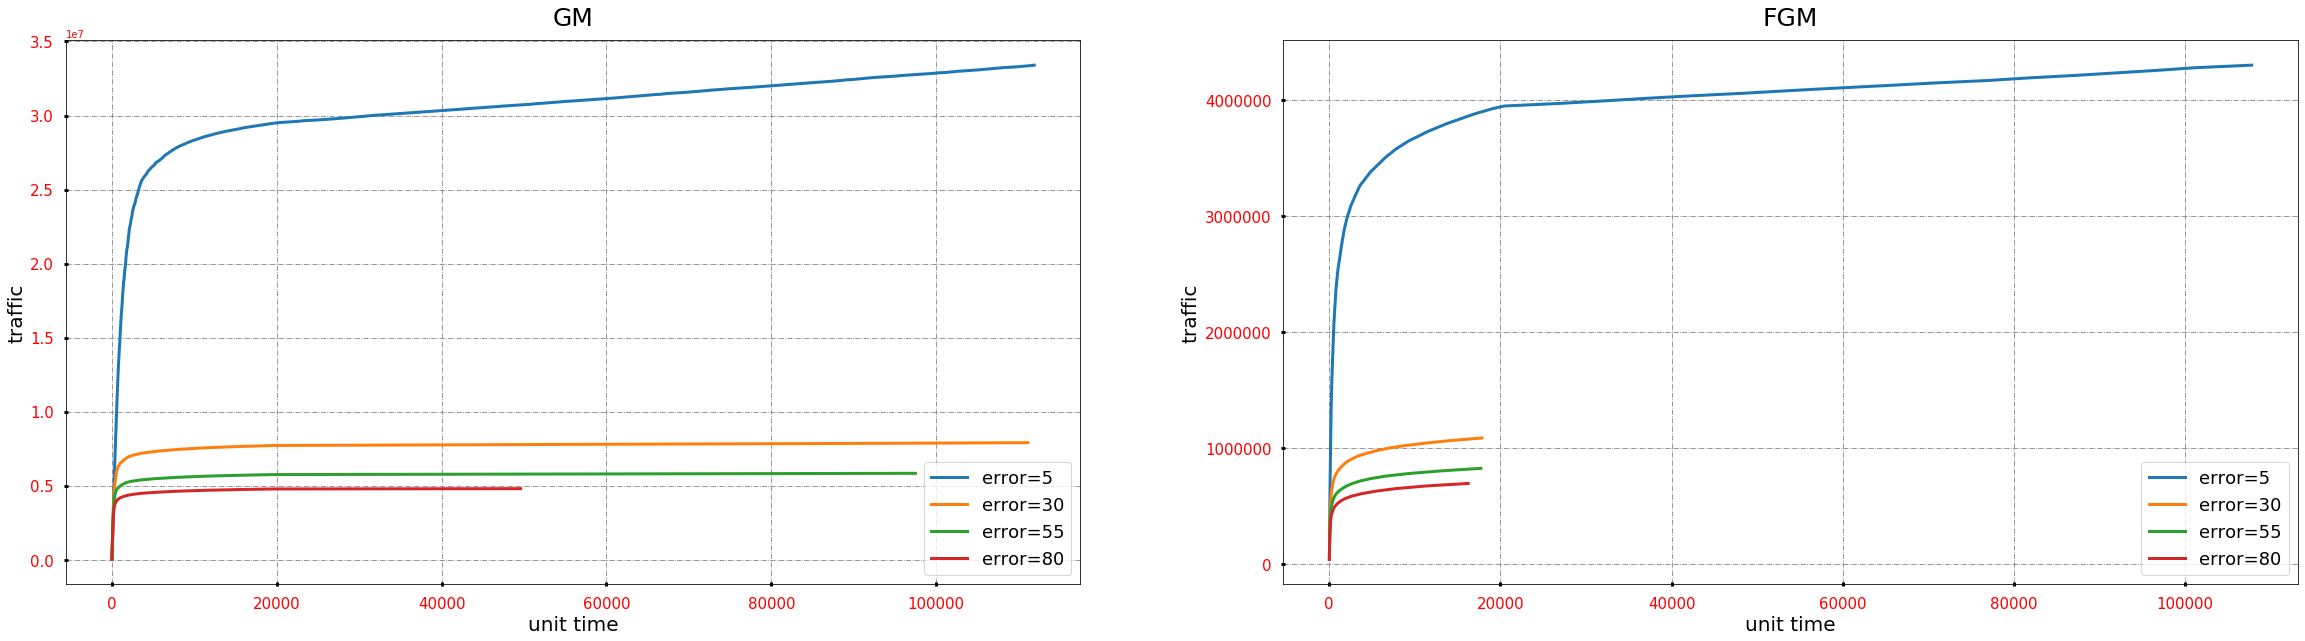

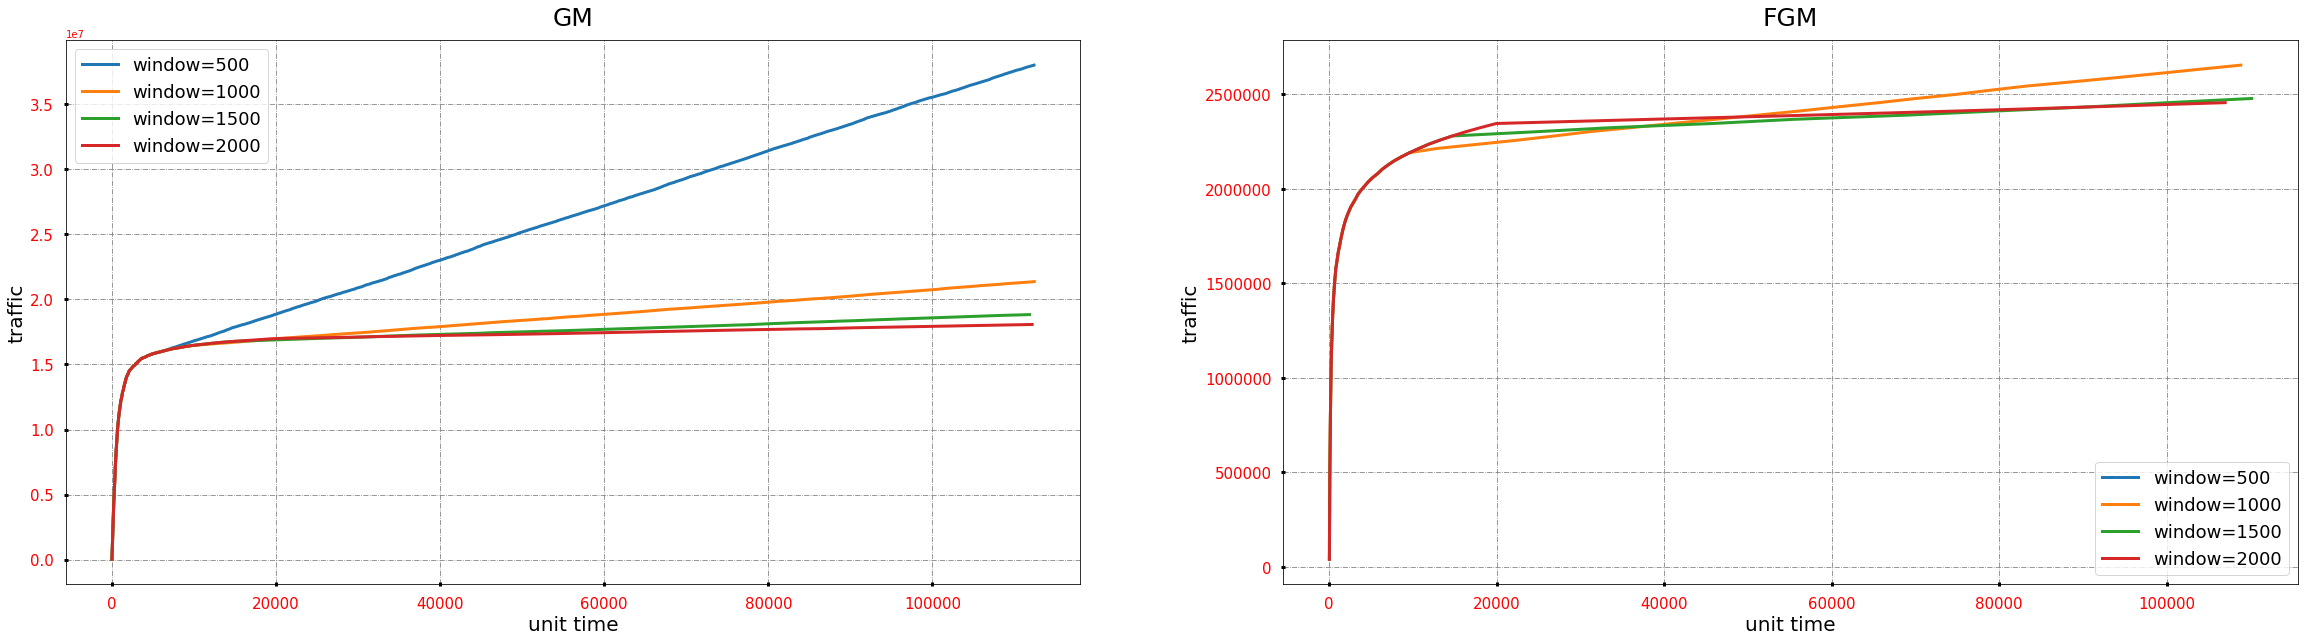

In [75]:
plot_traffic( data="fixed", metric="nodes", nodes=100, features=10, error=0.1, window=2000, epoch=1, tempo=30)
plot_traffic( data="fixed", metric="features", nodes=10, features=100, error=0.1, window=2000, epoch=1, tempo=30)
plot_traffic( data="fixed", metric="error", nodes=10, features=10, error=0.80, window=2000, epoch=1, tempo=25)
plot_traffic( data="fixed", metric="window", nodes=10, features=10, error=0.1, window=2000, epoch=1, tempo=500)

